## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""


In [1]:
import os
import keras
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# Try to enable GPU (optional)


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x / 255.)-1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [10]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [11]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [12]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 17s 345us/step - loss: 2.2178 - acc: 0.1645 - val_loss: 2.1003 - val_acc: 0.2140
Epoch 2/100
50000/50000 [==============================] - 15s 301us/step - loss: 1.9893 - acc: 0.2560 - val_loss: 1.8879 - val_acc: 0.3037
Epoch 3/100
50000/50000 [==============================] - 15s 298us/step - loss: 1.8254 - acc: 0.3369 - val_loss: 1.8123 - val_acc: 0.3587
Epoch 4/100
50000/50000 [==============================] - 15s 304us/step - loss: 1.7272 - acc: 0.3765 - val_loss: 1.6844 - val_acc: 0.3925
Epoch 5/100
50000/50000 [==============================] - 15s 304us/step - loss: 1.6512 - acc: 0.4070 - val_loss: 1.6089 - val_acc: 0.4273
Epoch 6/100
50000/50000 [==============================] - 15s 306us/step - loss: 1.5911 - acc: 0.4320 - val_loss: 1.6021 - val_acc: 0.4331
Epoch 7/100
50000/50000 [==============================] - 16s 311us/step - loss: 1.5462 - acc: 0.4452 - val_l

Epoch 59/100
50000/50000 [==============================] - 18s 352us/step - loss: 0.6614 - acc: 0.7641 - val_loss: 1.9862 - val_acc: 0.5027
Epoch 60/100
50000/50000 [==============================] - 17s 350us/step - loss: 0.6698 - acc: 0.7599 - val_loss: 1.9654 - val_acc: 0.5023
Epoch 61/100
50000/50000 [==============================] - 18s 351us/step - loss: 0.6427 - acc: 0.7686 - val_loss: 2.0242 - val_acc: 0.5046
Epoch 62/100
50000/50000 [==============================] - 18s 357us/step - loss: 0.6393 - acc: 0.7690 - val_loss: 1.9899 - val_acc: 0.5039
Epoch 63/100
50000/50000 [==============================] - 18s 352us/step - loss: 0.6316 - acc: 0.7712 - val_loss: 2.0507 - val_acc: 0.5027
Epoch 64/100
50000/50000 [==============================] - 18s 354us/step - loss: 0.6237 - acc: 0.7768 - val_loss: 2.0769 - val_acc: 0.5060
Epoch 65/100
50000/50000 [==============================] - 18s 352us/step - loss: 0.6304 - acc: 0.7722 - val_loss: 2.1063 - val_acc: 0.4944
Epoch 66/100


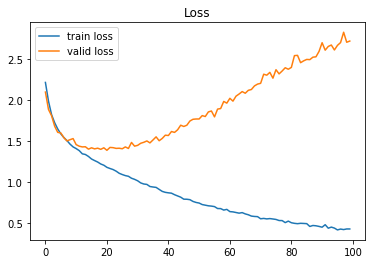

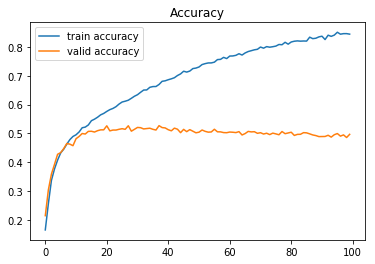

In [14]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()